In [1]:
# Check scikit-learn version
import sklearn
# This is the version that will be used
print(sklearn.__version__)

0.23.1


In [2]:
from numpy import where
#from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib import pyplot


## Looking at Synthetic classification Clustering

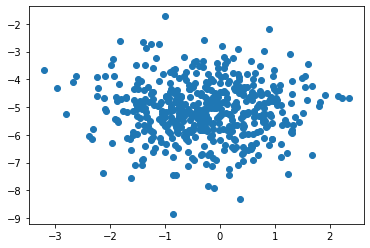

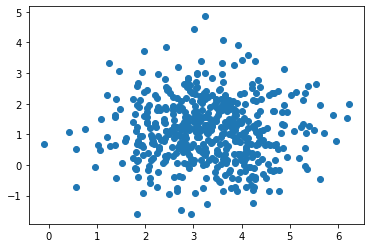

In [3]:
#Synthetic classification dataset
#Define Dataset
#X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
X, y = make_blobs(n_samples=1000, centers=2, n_features=4)
for class_value in range(2):
    #get row indexes for samples with this class
    row_ix = where(y == class_value)
    #Create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    #Show the plot
    pyplot.show()

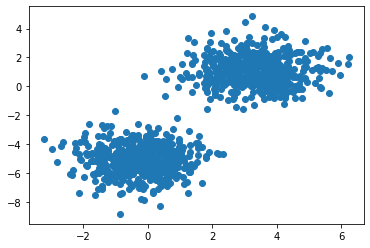

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

## Looking at Kmeans Clustering

0.7200090631507137

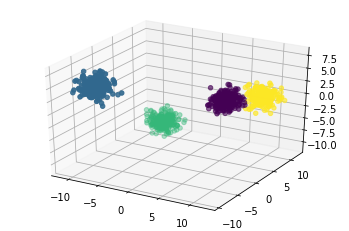

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=1000, centers=4, n_features=3)

km=KMeans(n_clusters=4)
km.fit(X)
labels=km.labels_

ax=plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
silhouette_score(X, labels)

2 clusters: 0.8629502821789042
2 clusters: -2938.4606644938863


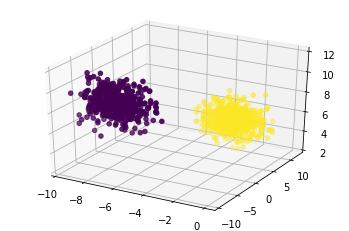

3 clusters: 0.5459159533954865
3 clusters: -2590.0453179866786


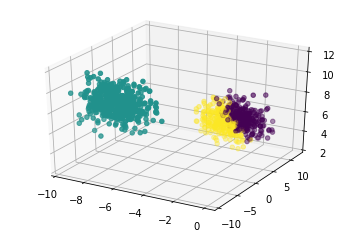

4 clusters: 0.23090518064768212
4 clusters: -2237.343184488746


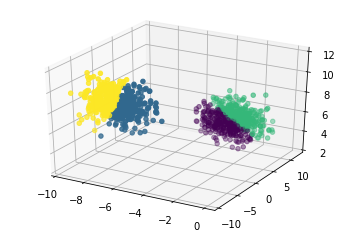

5 clusters: 0.23452376357182128
5 clusters: -2013.8034610992897


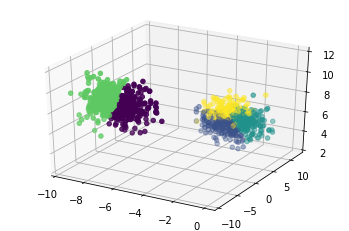

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=1000, centers=2, n_features=3)

guesses=[2, 3, 4, 5]
for each_guess in guesses: 
    km=KMeans(n_clusters=each_guess)
    km.fit(X)
    labels=km.labels_
    ax=plt.axes(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels)
    print(f'{each_guess} clusters: {silhouette_score(X, labels)}')
    print(f'{each_guess} clusters: {km.score(X, labels)}')
    plt.show()

## Importing our dataset

In [7]:
import pandas as pd
df=pd.read_csv('Data/scaled_data.csv')
df=df.drop(columns=['Unnamed: 0'], axis=1)

## Visualize with Correlation matrix

In [8]:
df.corr().style.background_gradient()

/Users/siaraleininger/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
/Users/siaraleininger/opt/anaconda3/lib/python3.8/site-packages/pandas/io/formats/style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,Happiness_Score,GDP,Social_Support,Life_Expectancy (Happiness),Freedom_Score,Generosity,Corruption_Score,Happiness (Dystopia),Beer_Servings,Spirit_Servings,Wine_Servings,Total_L_Pure_Alcohol,Life_Expectancy (LED),Adult_Mortality,infantdeaths,GDP_Health_Gov_Expenditure (%),HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,HIV/AIDS,GDP.1,Population,thinness1-19years,thinness5-9years,HDI,Schooling
Happiness_Score,1.000000,0.775445,0.764109,0.771219,0.592499,0.065331,-0.419593,nan,0.538061,0.341646,0.536227,0.489242,0.742036,-0.569297,-0.246324,-0.080572,0.223995,-0.165692,0.464924,-0.253973,0.399783,0.362245,-0.475136,0.455381,-0.006814,-0.558550,-0.544194,0.761802,0.701895
GDP,0.775445,1.000000,0.782250,0.851443,0.423071,-0.122246,-0.335573,nan,0.546706,0.395111,0.547392,0.526634,0.824718,-0.624344,-0.205920,-0.010646,0.283664,-0.070264,0.579350,-0.223760,0.489651,0.416380,-0.430658,0.487710,0.018256,-0.499835,-0.494329,0.897898,0.793026
Social_Support,0.764109,0.782250,1.000000,0.746707,0.482677,-0.054286,-0.212337,nan,0.558448,0.459249,0.452101,0.518413,0.719766,-0.515775,-0.285906,-0.128867,0.256557,-0.134792,0.490300,-0.294968,0.411815,0.367047,-0.379339,0.396696,-0.005451,-0.565577,-0.551332,0.775145,0.699281
Life_Expectancy (Happiness),0.771219,0.851443,0.746707,1.000000,0.453230,-0.073388,-0.354834,nan,0.472122,0.402451,0.540932,0.460289,0.945392,-0.769190,-0.264703,0.027118,0.385094,-0.076902,0.529175,-0.292047,0.532040,0.494070,-0.620344,0.452783,-0.064756,-0.546692,-0.542649,0.862449,0.790146
Freedom_Score,0.592499,0.423071,0.482677,0.453230,1.000000,0.251895,-0.421152,nan,0.254851,0.090193,0.234728,0.197718,0.404540,-0.216020,-0.003773,-0.049933,0.189746,0.081127,0.095647,-0.016197,0.275055,0.289519,-0.206215,0.271877,0.007127,-0.244938,-0.222294,0.418739,0.369642
Generosity,0.065331,-0.122246,-0.054286,-0.073388,0.251895,1.000000,-0.276100,nan,-0.251523,-0.131114,-0.072209,-0.173405,-0.110892,0.023829,0.086731,-0.022373,-0.011258,0.073776,-0.160737,0.089885,-0.139478,-0.018542,-0.016582,0.079798,0.211263,0.135642,0.129272,-0.147918,-0.138848
Corruption_Score,-0.419593,-0.335573,-0.212337,-0.354834,-0.421152,-0.276100,1.000000,nan,-0.141854,0.042956,-0.328477,-0.208367,-0.314497,0.247546,0.082104,0.092506,-0.127693,0.068507,-0.218117,0.087555,-0.220425,-0.186334,0.149487,-0.343396,0.064316,0.183507,0.182640,-0.321081,-0.319420
Happiness (Dystopia),nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Beer_Servings,0.538061,0.546706,0.558448,0.472122,0.254851,-0.251523,-0.141854,nan,1.000000,0.474127,0.546176,0.833575,0.474494,-0.228156,-0.213633,-0.034896,0.009203,-0.143041,0.331914,-0.220184,0.258505,0.133119,-0.131182,0.332001,-0.055168,-0.499008,-0.495869,0.574425,0.599165
Spirit_Servings,0.341646,0.395111,0.459249,0.402451,0.090193,-0.131114,0.042956,nan,0.474127,1.000000,0.232426,0.635453,0.385029,-0.270927,-0.123839,0.038891,-0.005048,0.050817,0.340107,-0.141172,0.238345,0.063307,-0.295087,0.130578,-0.144158,-0.426575,-0.394778,0.444423,0.404055


## Pulling data for Kmeans Clustering

In [9]:
columns_int=['GDP', 'Social_Support',
       'Life_Expectancy (Happiness)', 'Freedom_Score', 'Generosity',
       'Corruption_Score', 'Beer_Servings',
       'Spirit_Servings', 'Wine_Servings', 'Total_L_Pure_Alcohol',
       'Life_Expectancy (LED)', 'Adult_Mortality', 'infantdeaths',
       'GDP_Health_Gov_Expenditure (%)', 'HepatitisB', 'Measles', 'BMI',
       'under-fivedeaths', 'Polio', 'Diphtheria', 'HIV/AIDS', 'GDP.1',
       'Population', 'thinness1-19years', 'thinness5-9years', 'HDI',
       'Schooling']
X=df[columns_int[:3]].dropna()
len(X)

155

In [10]:
X

,GDP,Social_Support,Life_Expectancy (Happiness)
0,0.929138,0.979132,0.936153
1,0.940905,0.980836,0.942685
2,0.958889,0.967350,0.964818
3,0.940779,1.000000,0.950464
4,0.968310,0.977240,0.953078
...,...,...,...
150,0.578582,0.327762,0.588507
151,0.663725,0.554891,0.795510
152,0.686921,0.782925,0.724140
153,0.648464,0.568097,0.664023


## Applying Kmeans clustering with silhouette and kmeans score

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Generosity', 'Corruption_Score', 'Beer_Servings', 'Spirit_Servings',
       'Wine_Servings', 'Total_L_Pure_Alcohol', 'Life_Expectancy (LED)',
       'Adult_Mortality', 'infantdeaths', 'GDP_Health_Gov_Expenditure (%)',
       'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio',
       'Diphtheria', 'HIV/AIDS', 'GDP.1', 'Population', 'thinness1-19years',
       'thinness5-9years', 'HDI', 'Schooling'],
      dtype='object')
2 clusters: 0.2539793096905373
2 clusters: -100.41185077157736


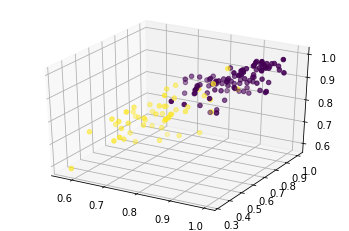

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Generosity', 'Corruption_Score', 'Beer_Servings', 'Spirit_Servings',
       'Wine_Servings', 'Total_L_Pure_Alcohol', 'Life_Expectancy (LED)',
       'Adult_Mortality', 'infantdeaths', 'GDP_Health_Gov_Expenditure (%)',
       'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio',
       'Diphtheria', 'HIV/AIDS', 'GDP.1', 'Population', 'thinness1-19years',
       'thinness5-9years', 'HDI', 'Schooling'],
      dtype='object')
3 clusters: 0.16957782145425715
3 clusters: -86.19235861030414


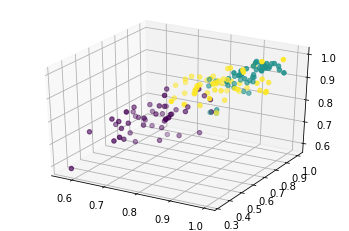

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Generosity', 'Corruption_Score', 'Beer_Servings', 'Spirit_Servings',
       'Wine_Servings', 'Total_L_Pure_Alcohol', 'Life_Expectancy (LED)',
       'Adult_Mortality', 'infantdeaths', 'GDP_Health_Gov_Expenditure (%)',
       'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio',
       'Diphtheria', 'HIV/AIDS', 'GDP.1', 'Population', 'thinness1-19years',
       'thinness5-9years', 'HDI', 'Schooling'],
      dtype='object')
4 clusters: 0.1917739524336157
4 clusters: -75.54580440350482


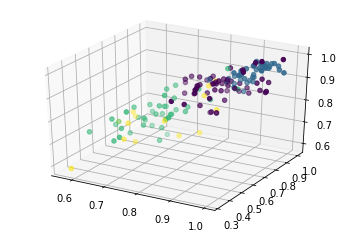

Index(['GDP', 'Social_Support', 'Life_Expectancy (Happiness)', 'Freedom_Score',
       'Generosity', 'Corruption_Score', 'Beer_Servings', 'Spirit_Servings',
       'Wine_Servings', 'Total_L_Pure_Alcohol', 'Life_Expectancy (LED)',
       'Adult_Mortality', 'infantdeaths', 'GDP_Health_Gov_Expenditure (%)',
       'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio',
       'Diphtheria', 'HIV/AIDS', 'GDP.1', 'Population', 'thinness1-19years',
       'thinness5-9years', 'HDI', 'Schooling'],
      dtype='object')
5 clusters: 0.18446108009113002
5 clusters: -68.98596798822452


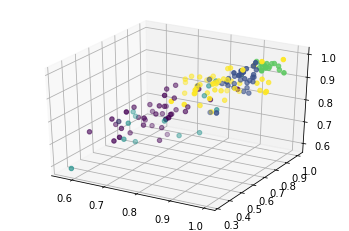

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
# X=df[np.random.choice(columns_int, replace=False, size=3)].dropna()
X=df[columns_int].dropna()
guess_list=[2, 3, 4, 5]
for each_guess in guess_list: 
    km=KMeans(n_clusters=each_guess)
    km.fit(X)
    labels=km.labels_
    ax=plt.axes(projection='3d')
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels)
    print(f'{X.columns}')
    print(f'{each_guess} clusters: {silhouette_score(X, labels)}')
    print(f'{each_guess} clusters: {km.score(X, labels)}')
    plt.show()

In [12]:
# The more the clusters are mixed, implies chaos
# 3 clusters is more optimal as less chaos is implied
# need Elbow curve method